✅ NYC Baseline Climate (Temperature & Precipitation)
   Month/Period  Mean Temperature  Mean Precipitation
1       January              32.8                 3.7
2      February              35.5                 3.1
3         March              42.7                 4.4
4         April              53.3                 4.5
5           May              62.6                 4.2
6          June              71.7                 4.4
7          July              76.7                 4.6
8        August              75.5                 4.4
9     September              68.2                 4.3
10      October              57.2                 4.4
11     November              47.9                 4.0
12     December              37.8                 4.0


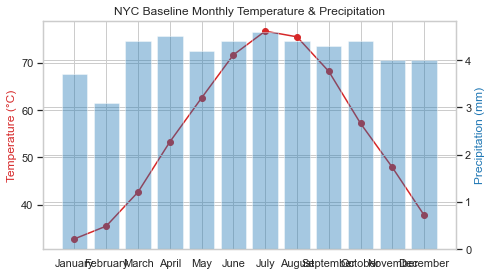


✅ NYC Heat Vulnerability Index (HVI) Sample:
   ZIP Code Tabulation Area (ZCTA) 2020  Heat Vulnerability Index (HVI)
0                                 10465                               1
1                                 10310                               3
2                                 11203                               5
3                                 11224                               5
4                                 11212                               5
5                                 11208                               4
6                                 10304                               3
7                                 10009                               2
8                                 10458                               5
9                                 10454                               5


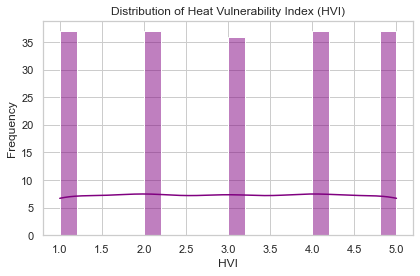

In [5]:
# %% ============================================================
# Step 1️⃣ Preview three baseline datasets: Temperature, Precipitation, HVI
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === File paths ===
temp_file = "New_York_City_Climate_Projections__Temperature_and_Precipitation.csv"
hvi_file  = "Heat_Vulnerability_Index_Rankings.csv"

# === Month mapping ===
MONTH_MAP = {
    "January":1,"February":2,"March":3,"April":4,"May":5,"June":6,
    "July":7,"August":8,"September":9,"October":10,"November":11,"December":12
}
valid_months = list(MONTH_MAP.keys())

# === Load Temperature & Precipitation Data ===
temp = pd.read_csv(temp_file)
temp.columns = temp.columns.str.strip()

# 仅取 12 个月份 + baseline 期
temp = temp[temp["Month/Period"].isin(valid_months)]
mask_baseline = temp["Year"].astype(str).str.contains("Baseline", case=False, na=False)
if mask_baseline.any():
    temp = temp[mask_baseline]

# 去掉符号并转成 float
def _to_float(s):
    return pd.to_numeric(
        pd.Series(s).astype(str)
        .str.replace("掳","", regex=False)
        .str.replace("°","", regex=False)
        .str.extract(r"([-+]?\d+\.?\d*)")[0],
        errors="coerce"
    )

temp["Mean Temperature"]   = _to_float(temp["Mean Temperature"])
temp["Mean Precipitation"] = _to_float(temp["Mean Precipitation"])
temp["Month"] = temp["Month/Period"].map(MONTH_MAP)

# 按月份排序
temp = temp.sort_values("Month")

print("✅ NYC Baseline Climate (Temperature & Precipitation)")
print(temp[["Month/Period","Mean Temperature","Mean Precipitation"]].head(12))

# === Plot baseline temperature & precipitation ===
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()

ax1.plot(temp["Month/Period"], temp["Mean Temperature"], "o-", color="tab:red", label="Mean Temperature (°C)")
ax2.bar(temp["Month/Period"], temp["Mean Precipitation"], alpha=0.4, color="tab:blue", label="Mean Precipitation (mm)")

ax1.set_ylabel("Temperature (°C)", color="tab:red")
ax2.set_ylabel("Precipitation (mm)", color="tab:blue")
plt.title("NYC Baseline Monthly Temperature & Precipitation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === Load Heat Vulnerability Index (HVI) Data ===
hvi = pd.read_csv(hvi_file)
hvi.columns = hvi.columns.str.strip()

# 提取主要列
hvi_preview = hvi[["ZIP Code Tabulation Area (ZCTA) 2020", "Heat Vulnerability Index (HVI)"]].copy()
print("\n✅ NYC Heat Vulnerability Index (HVI) Sample:")
print(hvi_preview.head(10))

# === Plot HVI Distribution ===
plt.figure(figsize=(6,4))
sns.histplot(hvi_preview["Heat Vulnerability Index (HVI)"], bins=20, kde=True, color="purple")
plt.title("Distribution of Heat Vulnerability Index (HVI)")
plt.xlabel("HVI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [3]:
hvi = pd.read_csv("Heat_Vulnerability_Index_Rankings.csv")
hvi["ZIP Code Tabulation Area (ZCTA) 2020"] = (
    hvi["ZIP Code Tabulation Area (ZCTA) 2020"].astype(str).str[:5]
)
df["Postcode"] = df["Postcode"].astype(str).str[:5]

df = pd.merge(
    df,
    hvi[["ZIP Code Tabulation Area (ZCTA) 2020", "Heat Vulnerability Index (HVI)"]],
    left_on="Postcode", right_on="ZIP Code Tabulation Area (ZCTA) 2020",
    how="left"
)
df.drop(columns=[c for c in df.columns if "ZIP Code Tabulation Area" in c], inplace=True)
df.rename(columns={"Heat Vulnerability Index (HVI)": "HVI"}, inplace=True)

# 🔹 单独展示一次 HVI 表
display(hvi.head(10))

,ZIP Code Tabulation Area (ZCTA) 2020,Heat Vulnerability Index (HVI)
0,10465,1
1,10310,3
2,11203,5
3,11224,5
4,11212,5
5,11208,4
6,10304,3
7,10009,2
8,10458,5
9,10454,5
